## Getting and Preprocessing the Data

In [1]:
import numpy as np
import pandas as pd

In [3]:
train_set = pd.read_csv('adult.data.txt', header = None)
test_set = pd.read_csv('adult.test.txt',
                      skiprows = 1, header = None) # Make sure to skip a row for the test set

Let's check our train and test sets for any possible issues. 

In [4]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


- We don't have a column header for our data
- There seem to be some unknown values in the fifth row of the test set (the question marks) we need to deal with
- The target values have periods at the end in the test set but do not in the training set (<=50K. vs. <=50K)

In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

Apply these to both dataframes. 

In [7]:
train_set.columns = col_labels
test_set.columns = col_labels

Next, let's check to see if pandas has identified any of these missing values. 

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
test_set['wage_class'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: wage_class, dtype: int64

In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


** Replace ? with NAN and drop NAN **

In [11]:
train_set.replace(' ?', np.nan).dropna().shape 

(30162, 15)

In [12]:
test_set.replace(' ?', np.nan).dropna().shape

(15060, 15)

In [13]:
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()

** Replace all of the '<=50K.' with '<=50K' and the same for '>50K.' with '>50K' **

In [14]:
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

Checking the unique values from each set, we can see if they now match.

In [15]:
test_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
train_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

## Applying Ordinal Encoding to Categoricals

In [17]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [18]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education_num     45222 non-null int64
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null object
wage_class        45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


We can see they are now combined. Next, if the feature is not already numerical, we need to encode it as one. We can use pandas Categorical codes for this task. To make things more simple, I will use a loop to apply this on every feature that isn't an integer. 

In [19]:
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [20]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null int8
fnlwgt            45222 non-null int64
education         45222 non-null int8
education_num     45222 non-null int64
marital_status    45222 non-null int8
occupation        45222 non-null int8
relationship      45222 non-null int8
race              45222 non-null int8
sex               45222 non-null int8
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null int8
wage_class        45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


Now that we have all of our features encoded, we need to split these back into their original train/test sizes. Since they haven't been shuffled we just need to retrieve the same indices as before. 

In [21]:
final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [22]:
final_train.to_csv('wage_train.csv',index=False)
final_test.to_csv('wage_test.csv',index=False)

In [21]:
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [38]:
rfc.fit(final_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [39]:
predictions = rfc.predict(final_test)

In [40]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.850199203187
confusion matrix
 [[10507   853]
 [ 1403  2297]]


In [41]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90     11360
          1       0.73      0.62      0.67      3700

avg / total       0.84      0.85      0.85     15060



In [42]:
y_proba = model.predict_proba(final_test)
y_prob=y_proba[:,1]

In [43]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [44]:
roc_auc

0.91813941758660067

## GBM

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grd = GradientBoostingClassifier(n_estimators=100)

In [68]:
grd.fit(final_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [71]:
predictions = grd.predict(final_test)

In [72]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.862948207171
confusion matrix
 [[10759   601]
 [ 1463  2237]]


In [73]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.60      0.68      3700

avg / total       0.86      0.86      0.86     15060



In [74]:
y_proba = model.predict_proba(final_test)
y_prob=y_proba[:,1]

In [75]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.91813941758660067

## XGBoost

In [22]:
!pip install xgboost

    100% |################################| 1.2MB 995kB/s eta 0:00:01
  Running setup.py bdist_wheel for xgboost ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /home/nbuser/.cache/pip/wheels/5e/c1/d6/522af54e5cc001fad4dd855117f8bf61b11d56443e06672e26
Successfully built xgboost
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
model = xgb.XGBClassifier()

In [25]:
model.fit(final_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [26]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, auc ,roc_curve
y_pred = model.predict(final_test) # Predict using our testdmat
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [34]:
y_proba = model.predict_proba(final_test)
y_prob=y_proba[:,1]

In [27]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.86155378486055778, 0.13844621513944222)

In [28]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix\n %s' % cm)
print(classification_report(y_test,y_pred))

confusion matrix
 [[10785   575]
 [ 1510  2190]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.86      0.86      0.85     15060



In [35]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


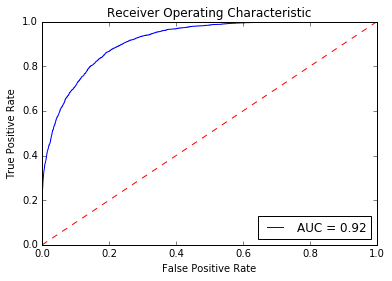

In [36]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

** Parameters Tuning **

To see all of the available parameters that can be tuned in XGBoost, have a look at the [parameter documentation](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md). This should help you better understand the choices

In [45]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 


Now let's run our grid search with 5-fold cross-validation and see which parameters perform the best.

In [46]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

Let's check our grid scores.

In [47]:
optimized_GBM.grid_scores_

[mean: 0.86685, std: 0.00239, params: {'min_child_weight': 1, 'max_depth': 3},
 mean: 0.86659, std: 0.00371, params: {'min_child_weight': 3, 'max_depth': 3},
 mean: 0.86725, std: 0.00317, params: {'min_child_weight': 5, 'max_depth': 3},
 mean: 0.86178, std: 0.00317, params: {'min_child_weight': 1, 'max_depth': 5},
 mean: 0.85953, std: 0.00251, params: {'min_child_weight': 3, 'max_depth': 5},
 mean: 0.86158, std: 0.00239, params: {'min_child_weight': 5, 'max_depth': 5},
 mean: 0.85611, std: 0.00330, params: {'min_child_weight': 1, 'max_depth': 7},
 mean: 0.85525, std: 0.00323, params: {'min_child_weight': 3, 'max_depth': 7},
 mean: 0.85714, std: 0.00320, params: {'min_child_weight': 5, 'max_depth': 7}]

In [48]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

Again, check the grid scores. 

In [49]:
optimized_GBM.grid_scores_

[mean: 0.86622, std: 0.00271, params: {'subsample': 0.7, 'learning_rate': 0.1},
 mean: 0.86685, std: 0.00239, params: {'subsample': 0.8, 'learning_rate': 0.1},
 mean: 0.86771, std: 0.00349, params: {'subsample': 0.9, 'learning_rate': 0.1},
 mean: 0.85999, std: 0.00307, params: {'subsample': 0.7, 'learning_rate': 0.01},
 mean: 0.86032, std: 0.00272, params: {'subsample': 0.8, 'learning_rate': 0.01},
 mean: 0.86002, std: 0.00282, params: {'subsample': 0.9, 'learning_rate': 0.01}]

No, it doesn't look like we can improve on this. However, we may be able to optimize a little further by utilizing XGBoost's built-in cv which allows early stopping to prevent overfitting. 

** Early stopping CV **

Based on the CV testing performed earlier, we want to utilize the following parameters:

- Learning_rate (eta) = 0.1
- Subsample, colsample_bytree = 0.8
- Max_depth = 3
- Min_child_weight = 1


In [50]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

Now let's specify our parameters (with slightly different syntax in some places for the XGBoost native API) and set our stopping criteria. For now, let's be aggressive with the stopping and say we don't want the accuracy to improve for at least 100 new trees.

In [51]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

We can look at our CV results to see how accurate we were with these settings. The output is automatically saved into a pandas dataframe for us. 

In [52]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
457,0.130173,0.004067,0.116570,0.001104
458,0.130106,0.004026,0.116578,0.001137
459,0.130040,0.003949,0.116520,0.001080
460,0.130073,0.003919,0.116537,0.001141
461,0.129974,0.003961,0.116512,0.001133


Now that we have our best settings, let's create this as an XGBoost object model that we can reference later. 

In [53]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 461)

Notice that it trains very quickly. With our XG model object, we can then plot our feature importances using a built-in method. This is similar to the feature importances found in sklearn. 

In [54]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

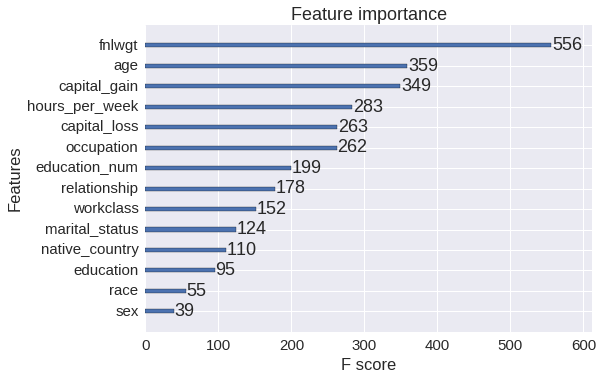

In [55]:
xgb.plot_importance(final_gb)

This will tell us which features were most important in the series of trees. The 'fnlwgt' feature seems to have the most importance. Filing capital gains was also important, which makes sense given that only those with greater incomes have the ability to invest. Race and sex were not as important. This may be because we are just predicting a specific threshold (below/above 50000 a year) instead of a precise income. 

In [59]:
testdmat = xgb.DMatrix(final_test)

In [60]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, auc ,roc_curve
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([ 0.00302884,  0.20670944,  0.30002904, ...,  0.8292715 ,
        0.15922189,  0.78374606], dtype=float32)

You can see that the predict function for XGBoost outputs probabilities by default and not actual class labels. To calculate accuracy we need to convert these to a 0/1 label. We will set 0.5 probability as our threshold. 

In [61]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

In [62]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  1.,  0.,  1.], dtype=float32)

Now we can calculate our accuracy. 

In [63]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.86965471447543163, 0.13034528552456837)

In [64]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.94      0.92     11360
          1       0.78      0.66      0.71      3700

avg / total       0.87      0.87      0.87     15060



In [65]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix\n %s' % cm)
print(classification_report(y_test,y_pred))

confusion matrix
 [[10652   708]
 [ 1255  2445]]
             precision    recall  f1-score   support

          0       0.89      0.94      0.92     11360
          1       0.78      0.66      0.71      3700

avg / total       0.87      0.87      0.87     15060



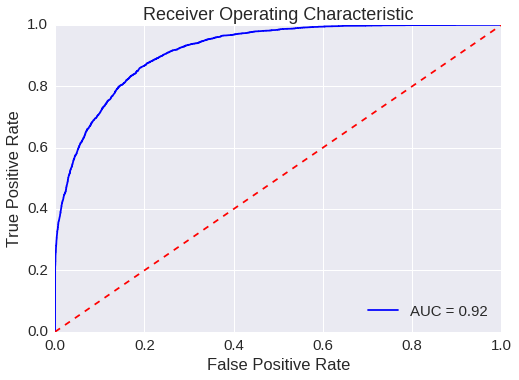

In [66]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()